# Exercise 3


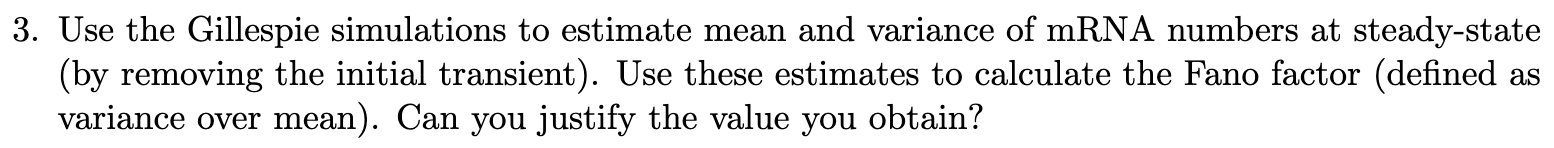


In [10]:
# load simulation results
import json

with open("ex2_sims.json") as f:
    simulation_results = json.loads(f.read())

In [11]:
import numpy as np

fano_factors = []
for sim in simulation_results:
    mrna = sim[1]
    # arbitraty cutoff (could be determined by the point where mean becomes stable)
    steady_state_values = np.array(mrna[100:])
    fano_factors.append(np.var(steady_state_values) / np.mean(steady_state_values))

In [12]:
fano_factors

[0.8205455813529668,
 1.0228633973202639,
 0.981786789868243,
 1.0163155052133466,
 0.8715261633231597]

The fano factors are all close to 1. This is true when variance = mean. Variance = mean is unsurprising as the variance 